# WINDOW FUNCTIONS 

## Question: How window functions are different from Aggregate functions? Are there any similarities between them?

### Aggregate functions gives us the result into one row by aggregating the rows together. For example, SUM, AVERAGE of Marks etc. 
### However, Window functions allows us to perform calculations on the rows that are related together along with not reducing the result into a single row and original identity of the rows is maintained.


### Window functions are similar to the aggregation done in the GROUP BY clause. However, rows are not grouped into a single row, each row retains their separate identity. That is, a window function may return a single value for each row. Here’s a good visualization of what I mean by that.



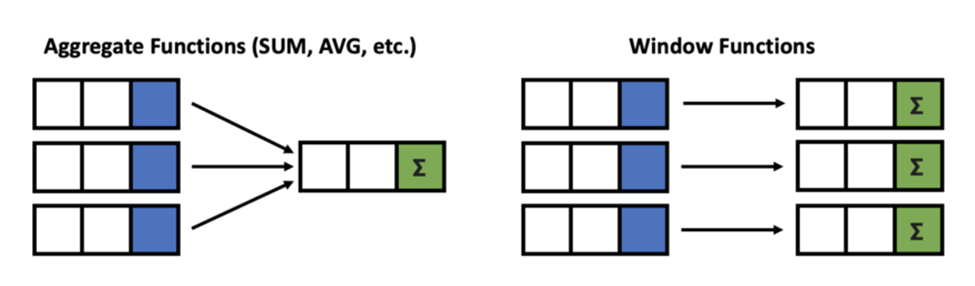

Picture credits:  https://towardsdatascience.com/a-guide-to-advanced-sql-window-functions-f63f2642cbf9

## WINDOW VS GROUP BY 
### Let’s say we have some salary data and we want to find to create a column that gives us the average salary for each job title.

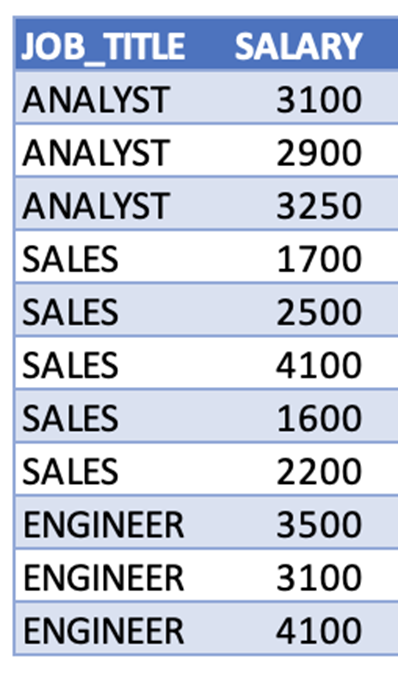


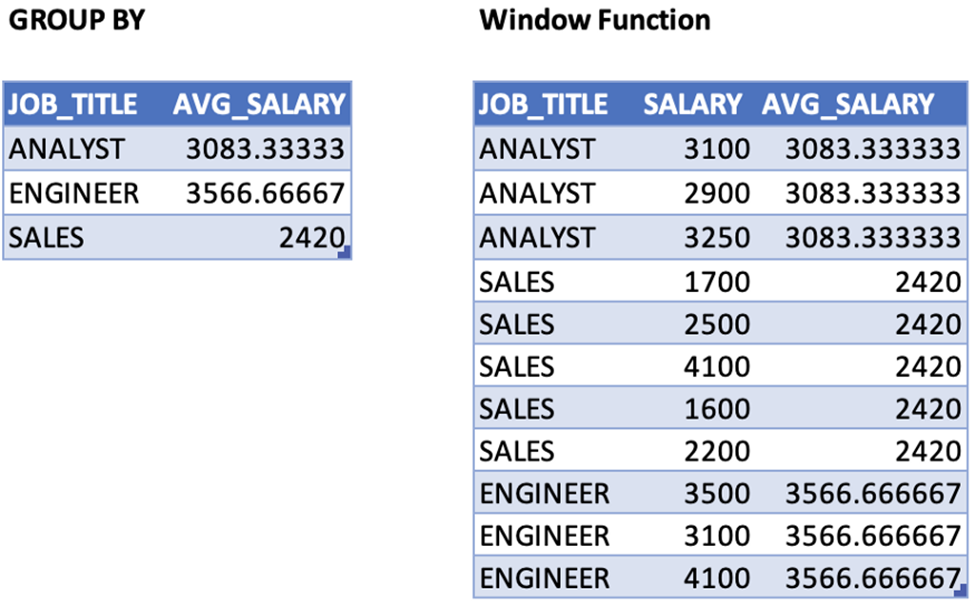

## LIST OF WINDOW FUNCTIONS 


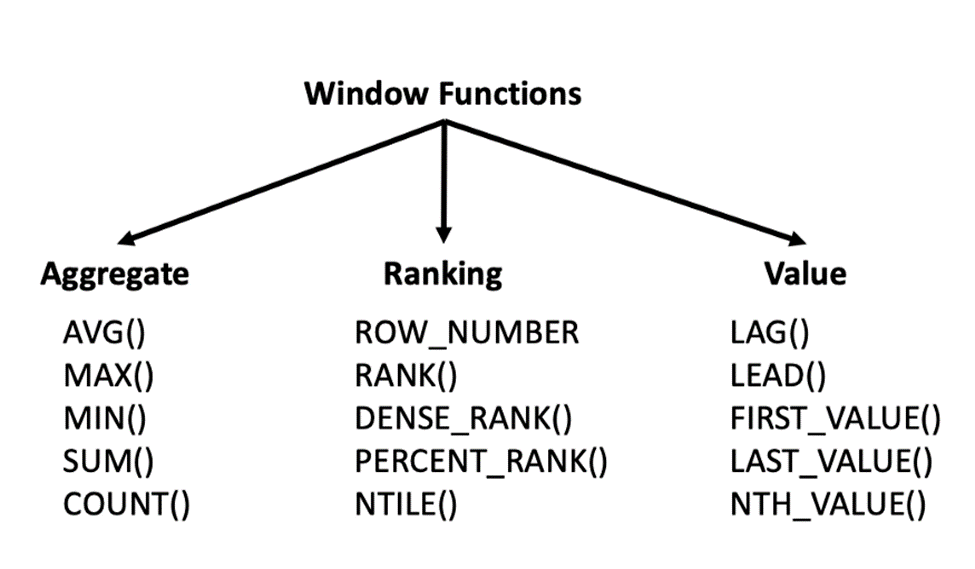

### Window Function Syntax
Here’s what the generic syntax looks like for a window function in the SELECT clause.

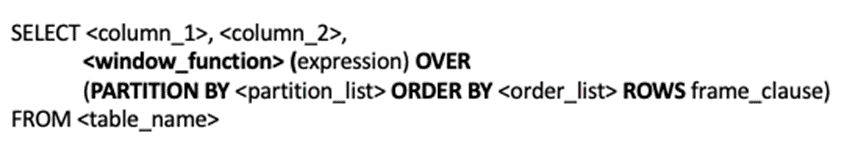


## Let's dig deep into the window functions by querying some data with SQL 

For that let's first do some work to get SQL into jupyter notebook

In [34]:
# importing pandas library 
import pandas as pd 

In [35]:
#importing the dataframe 

df = pd.read_csv('quakes.csv')

In [36]:
#reading the data
df.head()

,idstudent,studentname,studentscore
0,1,Jim,779
1,2,Steve,779
2,4,Mike,1240
3,5,Nancy,1167
4,7,Will,1073


## RUNNING SQL INTO JUPYTER NOTEBOOK

In [37]:
# importing the required packages 
import sqlite3

#install the ipython sql library
!pip install ipython-sql

In [38]:
# we will create a connection 
cnn = sqlite3.connect('jupyter_sql.db')

In [39]:
# load the sql module to ipython
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [40]:
%sql sqlite:///jupyter_sql.db

### Loading a pandas dataframe into a table 

In [41]:
%%sql

DROP TABLE student;

 * sqlite:///jupyter_sql.db
Done.


[]

In [42]:
# loading the data from the dataframe into a table STUDENT 
df.to_sql('student', cnn)

In [43]:
%%sql

SELECT * FROM students;

 * sqlite:///jupyter_sql.db
Done.


index,idstudent,studentname,studentscore
0,1,Jim,779
1,2,Steve,779
2,4,Mike,1240
3,5,Nancy,1167
4,7,Will,1073
5,11,Max,990
6,13,Dustin,1279
7,15,Eleven,990
8,17,Billy,1076


### Difference between ROW_NUM, RANK, DENSE_RANK 

In [49]:
%%sql


SELECT *,
ROW_NUMBER() OVER ( ORDER BY studentscore ) AS ROW_NUM,
ROW_NUMBER() OVER ( PARTITION BY studentscore ORDER BY studentscore)
AS ROW_NUM_with_par,
RANK() OVER ( ORDER BY studentscore ) AS RANK1,
RANK() OVER ( PARTITION BY studentscore ORDER BY studentscore)
AS RANK1_with_par,
DENSE_RANK() OVER ( ORDER BY studentscore ) AS DENSE_RANK1,
DENSE_RANK() OVER ( PARTITION BY studentscore ORDER BY studentscore)
AS DENSE_RANK1_with_par
FROM students;

 * sqlite:///jupyter_sql.db
Done.


index,idstudent,studentname,studentscore,ROW_NUM,ROW_NUM_with_par,RANK1,RANK1_with_par,DENSE_RANK1,DENSE_RANK1_with_par
0,1,Jim,779,1,1,1,1,1,1
1,2,Steve,779,2,2,1,1,1,1
5,11,Max,990,3,1,3,1,2,1
7,15,Eleven,990,4,2,3,1,2,1
4,7,Will,1073,5,1,5,1,3,1
8,17,Billy,1076,6,1,6,1,4,1
3,5,Nancy,1167,7,1,7,1,5,1
2,4,Mike,1240,8,1,8,1,6,1
6,13,Dustin,1279,9,1,9,1,7,1


### Here in the above example, we can clearly see the difference between RANK and DENSE_RANK,

## What is difference between Rank and Dense Rank ?
### Rank assigns serial number to rows and assigns same rank to the value that is same and skips the row value and jumps to next, however it doesn’t skip with the dense_rank

## When will ROW_NUMBER and RANK give different results?

### ROW_NUMBER gives the output in a sequence of values that starts with 1 with an increment of 1.

### The RANK function gives the same output with an increment of 1 but will repeat values for the ties, whereas DENSE_RANK will not skip values when ties are found.
### However, the situation is different when we use < windows_order_by_clause> as we in above example.